In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [ ]:
import pandas as pd

# Load Netflix dataset from Google Drive
df = pd.read_csv('/content/drive/My Drive/content/Netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Bersihkan dan Siapkan Data (Data cleaning)

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['year_added'] = df['date_added'].dt.year


format='%B %d, %Y': memberi tahu pandas format tanggal: nama bulan lengkap, tanggal, tahun

errors='coerce': jika ada data yang tidak bisa dikonversi, akan diubah menjadi NaT (null)

Tren Penambahan Konten per Tahun

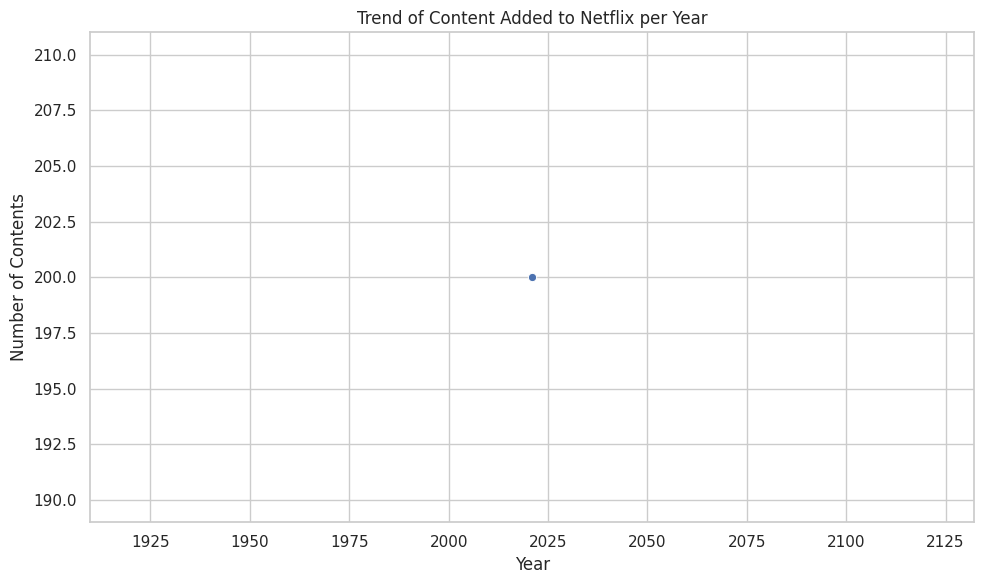

In [ ]:
content_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o')
plt.title('Trend of Content Added to Netflix per Year')
plt.xlabel('Year')
plt.ylabel('Number of Contents')
plt.grid(True)
plt.tight_layout()
plt.show()


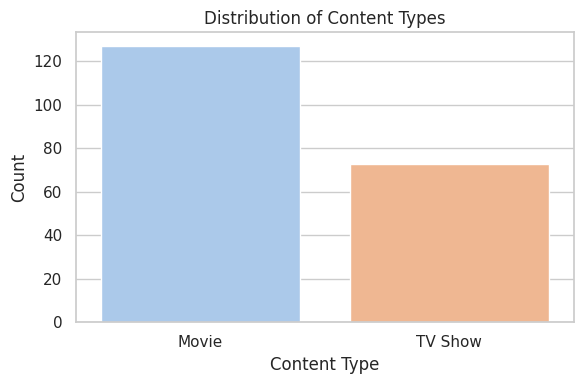

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', hue='type', palette='pastel', legend=False)
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

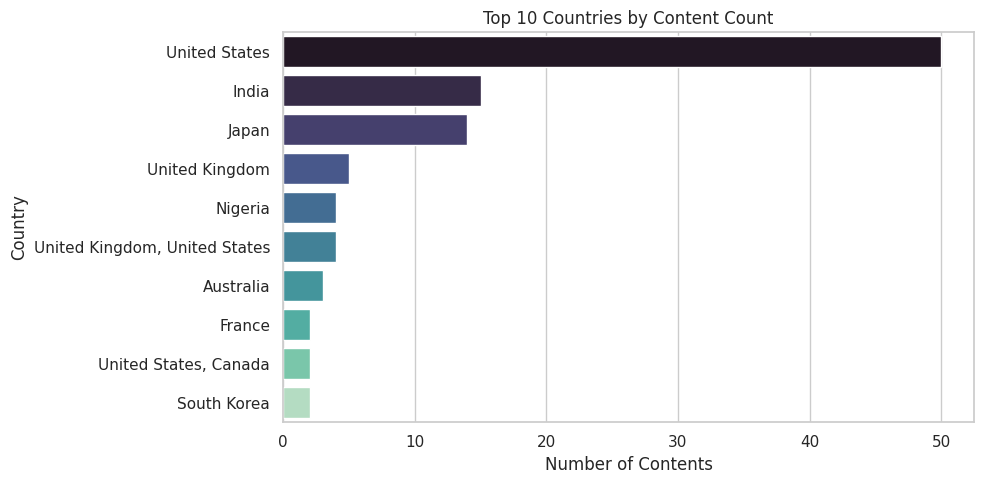

In [ ]:
top_countries = df['country'].value_counts().dropna().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='mako', legend=False)
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Contents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

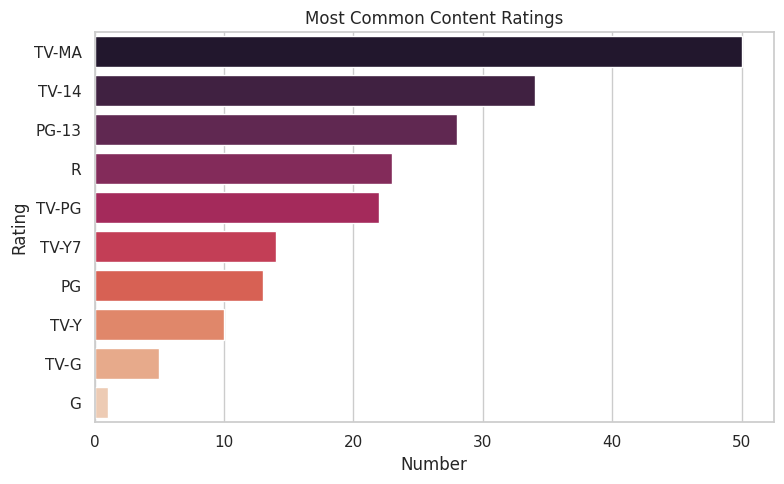

In [ ]:
top_ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_ratings.values, y=top_ratings.index, hue=top_ratings.index, palette='rocket', legend=False)
plt.title('Most Common Content Ratings')
plt.xlabel('Number')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

/tmp/ipython-input-881194225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='viridis')


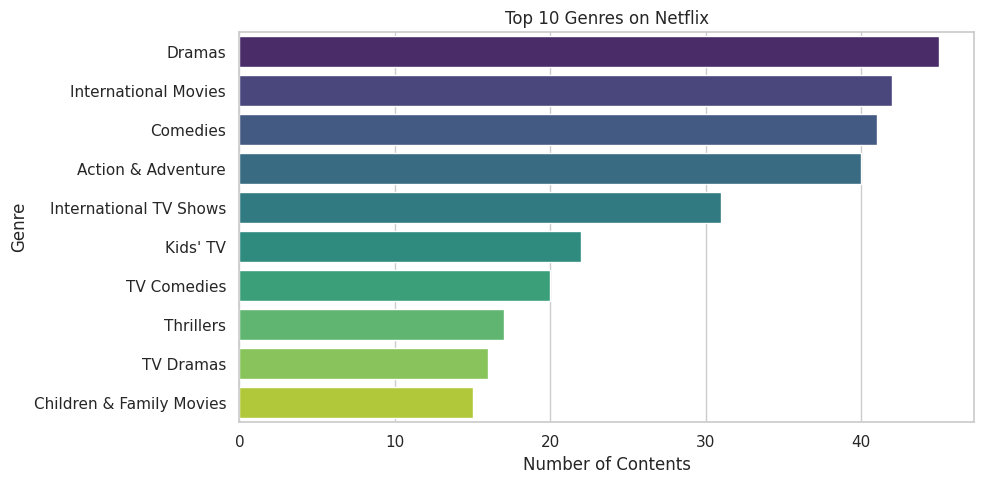

In [ ]:
genre_series = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
all_genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

genres, counts = zip(*top_genres)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(genres), palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Contents')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
